In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Conv2DTranspose, Input,MaxPooling2D,UpSampling2D
from keras.models import Model
#print('Max value in the x_train is',x_train.max())
#print('Min value in the x_train is',x_train.min())

In [3]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()

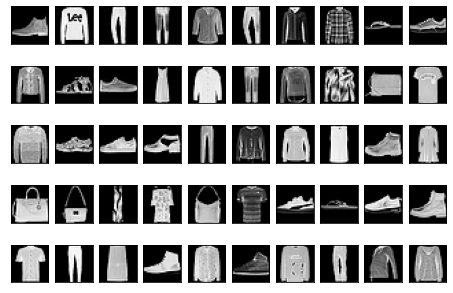

In [4]:
fig, axs = plt.subplots(5, 10) 
fig.tight_layout(pad=-1)
plt.gray()
x = 0 
for i in range(5): 
    for j in range(10): 
        axs[i, j].imshow(tf.squeeze(x_test[x])) 
        axs[i, j].xaxis.set_visible(False) 
        axs[i, j].yaxis.set_visible(False) 
        x = x + 1

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
#Creating noisy version of data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape, dtype=tf.float32)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape, dtype=tf.float32)

#Making sure that data lies between 0 and 1
x_train_noisy=tf.clip_by_value(x_train_noisy,0,1)
x_test_noisy=tf.clip_by_value(x_test_noisy,0,1)

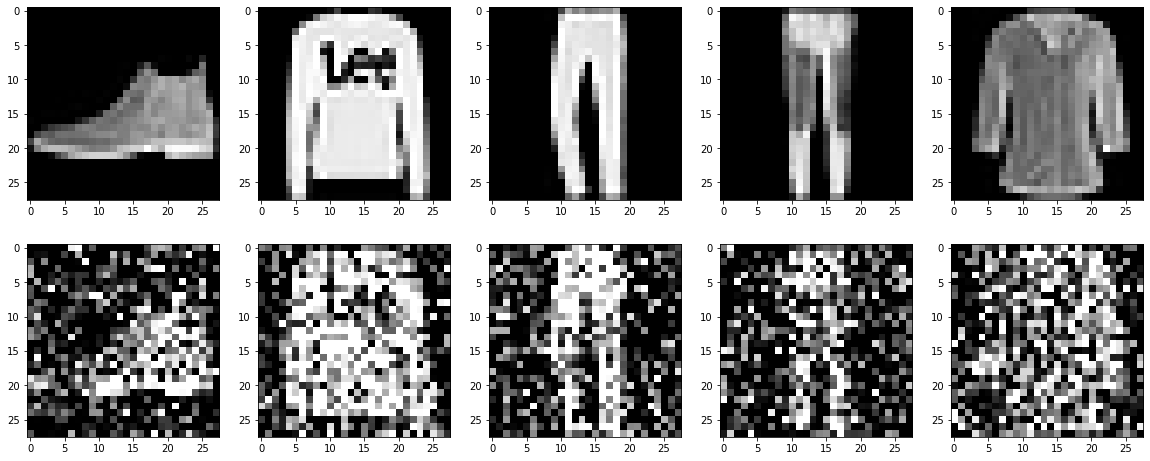

In [9]:
n=5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
    a=plt.subplot(2, n, i+1)
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    b=plt.subplot(2, n, i+1+n)
    plt.imshow(tf.squeeze(x_test_noisy[i]))
plt.show()


In [53]:
input = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2DTranspose(8, kernel_size=3, strides=2,activation='relu', padding='same')(encoded)
x = Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [54]:
autoencoder=Model(input,decoded)
autoencoder.compile(optimizer='adam',loss='mse')

In [55]:
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10,
                batch_size=128,
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0444 - val_loss: 0.0237
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0223 - val_loss: 0.0214
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0208 - val_loss: 0.0205
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0200 - val_loss: 0.0198
Epoch 5/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0195 - val_loss: 0.0193
Epoch 6/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0191 - val_loss: 0.0190
Epoch 7/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0188 - val_loss: 0.0187
Epoch 8/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0185 - val_loss: 0.0185
Epoch 9/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0183 - val_loss: 0.0184
Epoch 10/10
469/469 [==============================] - 35s 74ms/step - loss: 0.018

In [56]:
import h5py
model_json = autoencoder.to_json()
with open("autoencoder.json", "w") as json_file:
    json_file.write(model_json)

autoencoder.save_weights("model.h5")

In [57]:
json_file = open('autoencoder.json', 'r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=tf.keras.models.model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")


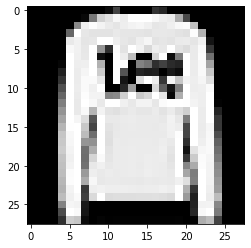

In [63]:
#decoded_img=loaded_model.predict(x_test_noisy)
decoded_img=autoencoder.predict(x_test_noisy)
i1=x_test[1]
i1.shape=(28,28)
plt.imshow(i1,cmap='gray')

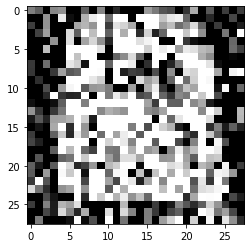

In [64]:
i2=x_test_noisy[1]
plt.imshow(i2,cmap='gray')


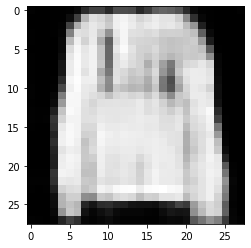

In [65]:
i3=decoded_img[1]
plt.imshow(i3,cmap='gray')